In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
# from tqdm import tqdm_notebook 
from tqdm import tqdm

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [5]:
class SigmoidNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None
    
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b
  
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
  
    def grad_w_mse(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
  
    def grad_b_mse(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)
  
    def grad_w_ce(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        if y == 0:
            return y_pred * x
        elif y == 1:
            return -1 * (1 - y_pred) * x
        else:
            raise ValueError("y should be 0 or 1")
    
    def grad_b_ce(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        if y == 0:
            return y_pred 
        elif y == 1:
            return -1 * (1 - y_pred)
        else:
            raise ValueError("y should be 0 or 1")
            
    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse", display_loss=False):
    
        # initialise w, b
        if initialise:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0

        if display_loss:
            loss = {}

        for i in tqdm(range(epochs), total=epochs, unit="epoch"):
            dw = 0
            db = 0
            for x, y in zip(X, Y):
                if loss_fn == "mse":
                    dw += self.grad_w_mse(x, y)
                    db += self.grad_b_mse(x, y) 
                elif loss_fn == "ce":
                    dw += self.grad_w_ce(x, y)
                    db += self.grad_b_ce(x, y)

            m = X.shape[1]  
            self.w -= learning_rate * dw/m
            self.b -= learning_rate * db/m

            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                if loss_fn == "mse":
                    loss[i] = mean_squared_error(Y, Y_pred)
                elif loss_fn == "ce":
                    loss[i] = log_loss(Y, Y_pred)

        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            if loss_fn == "mse":
                plt.ylabel('Mean Squared Error')
            elif loss_fn == "ce":
                plt.ylabel('Log Loss')
            plt.show()
      
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)


In [6]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

In [7]:
np.random.seed(0)

## Data Generation

In [8]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


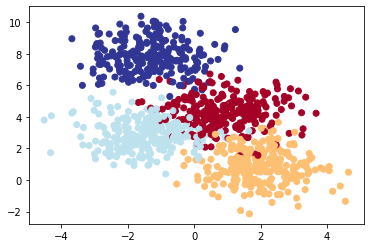

In [9]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap='RdYlBu')
plt.show()

In [10]:
labels_orig = labels
labels = np.mod(labels_orig, 2)

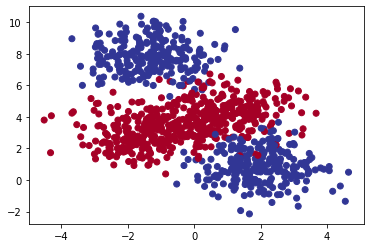

In [11]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap="RdYlBu")
plt.show()

In [12]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


In [32]:
print(X_train.dtype)
print(Y_train.dtype)

float64
int64


100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:22<00:00, 44.31epoch/s]


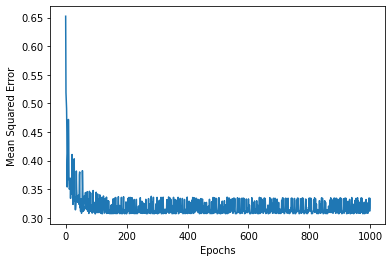

In [13]:
sn = SigmoidNeuron()
sn.fit(X_train, Y_train, epochs=1000, learning_rate=0.5, display_loss=True)

In [14]:
Y_pred_train = sn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = sn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.67
Validation accuracy 0.63


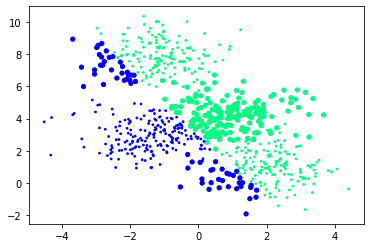

In [15]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='winter', s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

## Sigmoid Neuron on Diabetes dataset

In [16]:
import pandas as pd
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
columns=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
df1=df[columns]
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [62]:
x=df1
y=df["Outcome"]
x.shape
y.shape

(768,)

In [63]:
X_train, X_val, Y_train, Y_val = train_test_split(x, y, stratify=y, random_state=0)
print(X_train.shape, X_val.shape)
print(Y_train.shape, Y_val.shape)

(576, 8) (192, 8)
(576,) (192,)


In [64]:
X_train=X_train.values
Y_train=Y_train.values
X_val=X_val.values
Y_val=Y_val.values


In [65]:
print(X_train.dtype)
print(Y_train.dtype)

float64
int64


100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.03epoch/s]


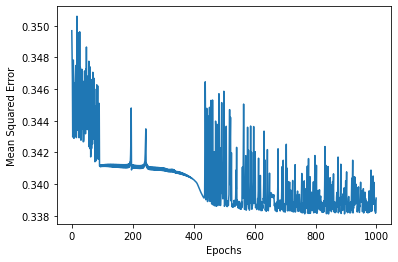

In [66]:
sn = SigmoidNeuron()
sn.fit(X_train, Y_train, epochs=1000, learning_rate=0.01, display_loss=True)

In [67]:
Y_pred_train = sn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = sn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.66
Validation accuracy 0.66


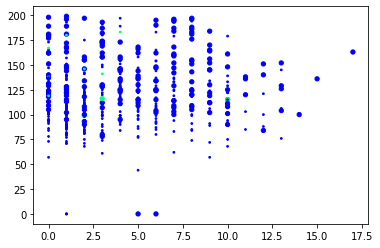

In [68]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='winter', s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

## Feed forward network

In [70]:
class FirstFFNetwork:
  
    def __init__(self):
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0

    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
  
    def forward_pass(self, x):
        self.x1, self.x2 = x
        self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
        self.h1 = self.sigmoid(self.a1)
        self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
        self.h2 = self.sigmoid(self.a2)
        self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
        self.h3 = self.sigmoid(self.a3)
        return self.h3

    def grad(self, x, y):
        self.forward_pass(x)

        self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
        self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
        self.db3 = (self.h3-y) * self.h3*(1-self.h3)

        self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
        self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
        self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)

        self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
        self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
        self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)
    
    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
        if initialise:
            self.w1 = np.random.randn()
            self.w2 = np.random.randn()
            self.w3 = np.random.randn()
            self.w4 = np.random.randn()
            self.w5 = np.random.randn()
            self.w6 = np.random.randn()
            self.b1 = 0
            self.b2 = 0
            self.b3 = 0
      
        if display_loss:
            loss = {}
        
        for i in tqdm(range(epochs), total=epochs, unit="epoch"):
            dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
            for x, y in zip(X, Y):
                self.grad(x, y)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                db1 += self.db1
                db2 += self.db2
                db3 += self.db3
            m = X.shape[1]
            self.w1 -= learning_rate * dw1 / m
            self.w2 -= learning_rate * dw2 / m
            self.w3 -= learning_rate * dw3 / m
            self.w4 -= learning_rate * dw4 / m
            self.w5 -= learning_rate * dw5 / m
            self.w6 -= learning_rate * dw6 / m
            self.b1 -= learning_rate * db1 / m
            self.b2 -= learning_rate * db2 / m
            self.b3 -= learning_rate * db3 / m
        
            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = mean_squared_error(Y_pred, Y)
            
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
    
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred)
    

## Feed forward network classification

100%|███████████████████████████████████████████████████████████████████████████| 2000/2000 [00:45<00:00, 44.38epoch/s]


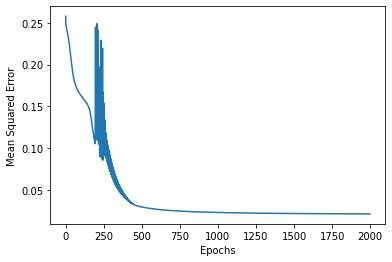

In [31]:
ffn = FirstFFNetwork()
ffn.fit(X_train, Y_train, epochs=2000, learning_rate=.01, display_loss=True)

In [32]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.98
Validation accuracy 0.94


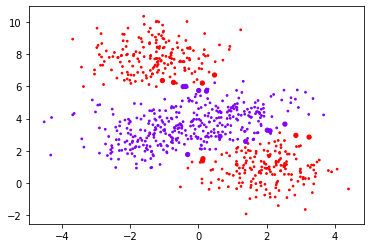

In [33]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='rainbow', s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

## FFN-Generic class

In [36]:
class FFSNNetwork:
  
    def __init__(self, n_inputs, hidden_sizes=[2]):
        self.nx = n_inputs
        self.ny = 1
        self.nh = len(hidden_sizes)
        self.sizes = [self.nx] + hidden_sizes + [self.ny]

        self.W = {}
        self.B = {}
        for i in range(self.nh+1):
            self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
            self.B[i+1] = np.zeros((1, self.sizes[i+1]))
  
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))

    def forward_pass(self, x):
        self.A = {}
        self.H = {}
        self.H[0] = x.reshape(1, -1)
        for i in range(self.nh+1):
            self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
            self.H[i+1] = self.sigmoid(self.A[i+1])
        return self.H[self.nh+1]
  
    def grad_sigmoid(self, x):
        return x*(1-x) 
    
    def grad(self, x, y):
        self.forward_pass(x)
        self.dW = {}
        self.dB = {}
        self.dH = {}
        self.dA = {}
        L = self.nh + 1
        self.dA[L] = (self.H[L] - y)
        for k in range(L, 0, -1):
            self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
            self.dB[k] = self.dA[k]
            self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
            self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
            
    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
        # initialise w, b
        if initialise:
            for i in range(self.nh+1):
                self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
                self.B[i+1] = np.zeros((1, self.sizes[i+1]))

        if display_loss:
            loss = {}
        
        for e in tqdm(range(epochs), total=epochs, unit="epoch"):
            dW = {}
            dB = {}
            for i in range(self.nh+1):
                dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
                dB[i+1] = np.zeros((1, self.sizes[i+1]))
            for x, y in zip(X, Y):
                self.grad(x, y)
                for i in range(self.nh+1):
                    dW[i+1] += self.dW[i+1]
                    dB[i+1] += self.dB[i+1]
        
            m = X.shape[1]
            for i in range(self.nh+1):
                self.W[i+1] -= learning_rate * dW[i+1] / m
                self.B[i+1] -= learning_rate * dB[i+1] / m
      
            if display_loss:
                Y_pred = self.predict(X)
                loss[e] = mean_squared_error(Y_pred, Y)
                
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred).squeeze()

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [01:24<00:00, 11.87epoch/s]


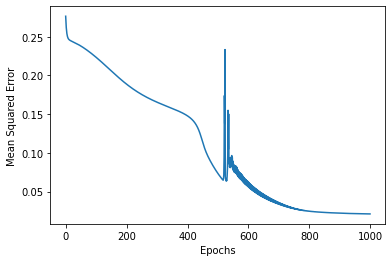

In [37]:
ffsnn = FFSNNetwork(2, [2, 3])
ffsnn.fit(X_train, Y_train, epochs=1000, learning_rate=.001, display_loss=True)

In [38]:
Y_pred_train = ffsnn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffsnn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.97
Validation accuracy 0.94


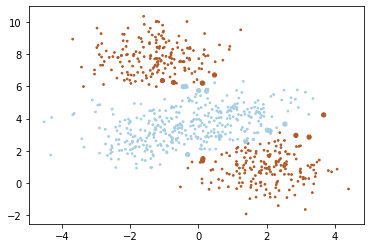

In [40]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Paired', s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()